In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 50

In [199]:
file3=pd.read_csv('Data/file3.csv')
file3

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [200]:
#chenge the files for having all the same column names

file_df = pd.read_csv('Data/file3.csv')
file_df.rename(columns={'State':'ST', 'Gender':'GENDER'}, inplace=True)
file_df

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [201]:
#Aggregate data into one Data Frame using Pandas.


def load_original_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.csv')
    file3 = file_df
    return pd.concat([file1,file2,file3], axis=0)
all_data = load_original_data()
all_data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [202]:
# Standardizing header names

all_data.rename(columns={'ST':'State', 'GENDER':'Gender'}, inplace=True)
all_data

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [203]:
# Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

all_data.drop(columns=['Customer'], inplace=True)
all_data

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [204]:
# Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). 
# Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.

all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9137 non-null   object 
 1   Gender                     9015 non-null   object 
 2   Education                  9137 non-null   object 
 3   Customer Lifetime Value    9130 non-null   object 
 4   Income                     9137 non-null   float64
 5   Monthly Premium Auto       9137 non-null   float64
 6   Number of Open Complaints  9137 non-null   object 
 7   Policy Type                9137 non-null   object 
 8   Vehicle Class              9137 non-null   object 
 9   Total Claim Amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [205]:

all_data['Number of Open Complaints'] =  pd.to_numeric(all_data['Number of Open Complaints'], errors ='ignore')
all_data

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [206]:
all_data.dtypes

State                         object
Gender                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [207]:
# clean the number of open complaints and extract the middle number which is changing between records. 
# pay attention that the number of open complaints is a categorical feature.

all_data['Number of Open Complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan, 0,
       2, 3, 1, 5, 4], dtype=object)

In [208]:
all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/0/00')] = 0
all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/2/00')] = 2
all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/3/00')] = 3
all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/5/00')] = 5
all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/4/00')] = 4
all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/1/00')] = 1
all_data['Number of Open Complaints'].unique()

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3205122833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/0/00')] = 0
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3205122833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'Number of Open Complaints'][(all_data['Number of Open Complaints'] == '1/2/00')] = 2
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3205122833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

array([0, 2, 1, 3, 5, 4, nan], dtype=object)

In [209]:
all_data['Number of Open Complaints'] =  pd.to_numeric(all_data['Number of Open Complaints'], errors ='ignore')
all_data

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [210]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9137 non-null   object 
 1   Gender                     9015 non-null   object 
 2   Education                  9137 non-null   object 
 3   Customer Lifetime Value    9130 non-null   object 
 4   Income                     9137 non-null   float64
 5   Monthly Premium Auto       9137 non-null   float64
 6   Number of Open Complaints  9137 non-null   float64
 7   Policy Type                9137 non-null   object 
 8   Vehicle Class              9137 non-null   object 
 9   Total Claim Amount         9137 non-null   float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


In [211]:
# Filtering data and Correcting typos – 
# Filter the data in state and gender column to standardize the texts in those columns

all_data['Gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [212]:
all_data.loc[:, 'Gender'][(all_data['Gender'] == 'female')] = "F"
all_data.loc[:, 'Gender'][(all_data['Gender'] == 'Femal')] = "F"
all_data.loc[:, 'Gender'][(all_data['Gender'] == 'Male')] = "M"


all_data['Gender'].unique()

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3780780792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'Gender'][(all_data['Gender'] == 'female')] = "F"
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3780780792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'Gender'][(all_data['Gender'] == 'Femal')] = "F"
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3780780792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

array([nan, 'F', 'M'], dtype=object)

In [213]:
all_data['State'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [214]:
all_data.loc[:, 'State'][(all_data['State'] == 'Cali')] = "California"
all_data.loc[:, 'State'][(all_data['State'] == 'AZ')] = "Arizona"
all_data.loc[:, 'State'][(all_data['State'] == 'WA')] = "Washington"
all_data['State'].unique()

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3254917453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'State'][(all_data['State'] == 'Cali')] = "California"
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3254917453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'State'][(all_data['State'] == 'AZ')] = "Arizona"
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3254917453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [215]:
# Removing duplicates

all_data = all_data.drop_duplicates()
all_data

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [216]:
# remove % from data

def convert(x):
    if type(x) == str:
        return x.rstrip('%')
    else:
        return x
all_data['Customer Lifetime Value']=all_data['Customer Lifetime Value'].apply(convert)
    

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/3994004257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Customer Lifetime Value']=all_data['Customer Lifetime Value'].apply(convert)


In [217]:
all_data

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [218]:
#check if % is removed
all_data['Customer Lifetime Value'].str.contains('%')

0         NaN
1       False
2       False
3       False
4       False
        ...  
7065      NaN
7066      NaN
7067      NaN
7068      NaN
7069      NaN
Name: Customer Lifetime Value, Length: 8876, dtype: object

In [219]:
all_data['Customer Lifetime Value'] =  pd.to_numeric(all_data['Customer Lifetime Value'])
all_data

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/1237860855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Customer Lifetime Value'] =  pd.to_numeric(all_data['Customer Lifetime Value'])


,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [220]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      8875 non-null   object 
 1   Gender                     8753 non-null   object 
 2   Education                  8875 non-null   object 
 3   Customer Lifetime Value    8868 non-null   float64
 4   Income                     8875 non-null   float64
 5   Monthly Premium Auto       8875 non-null   float64
 6   Number of Open Complaints  8875 non-null   float64
 7   Policy Type                8875 non-null   object 
 8   Vehicle Class              8875 non-null   object 
 9   Total Claim Amount         8875 non-null   float64
dtypes: float64(5), object(5)
memory usage: 762.8+ KB


In [221]:
all_data.dtypes

State                         object
Gender                        object
Education                     object
Customer Lifetime Value      float64
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints    float64
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [222]:
# Replacing null values – Replace missing values with means of the column (for numerical columns)

all_data['Customer Lifetime Value'].isnull().sum()

8

In [223]:
all_data['Number of Open Complaints'].isnull().sum()


1

In [224]:

all_data['Number of Open Complaints'].fillna((all_data['Number of Open Complaints'].mean()), inplace=True)
all_data

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [225]:
all_data['Customer Lifetime Value'].fillna((all_data['Customer Lifetime Value'].mean()), inplace=True)
all_data

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,1.855902e+05,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [226]:
all_data.isna().sum()

State                          1
Gender                       123
Education                      1
Customer Lifetime Value        0
Income                         1
Monthly Premium Auto           1
Number of Open Complaints      0
Policy Type                    1
Vehicle Class                  1
Total Claim Amount             1
dtype: int64

In [227]:
# select all rows with NaN under an entire DataFrame:

# pd.set_option('display.max_rows', None)  ---> to see all rows

all_data[all_data.isna().any(axis=1)]

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,185590.213124,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
11,California,NaN,College,819719.710000,0.0,110.0,0.0,Personal Auto,SUV,528.000000
12,California,NaN,Master,879879.700000,77026.0,110.0,2.0,Corporate Auto,Four-Door Car,472.029737
13,Arizona,NaN,High School or Below,881901.890000,99845.0,110.0,1.0,Corporate Auto,SUV,528.000000
14,California,NaN,College,538443.170000,83689.0,70.0,2.0,Corporate Auto,Four-Door Car,307.139132
...,...,...,...,...,...,...,...,...,...,...
167,Washington,NaN,College,244366.520000,92834.0,61.0,0.0,Special Auto,Four-Door Car,292.800000
228,Washington,NaN,Bachelor,501888.520000,54500.0,63.0,0.0,Corporate Auto,Two-Door Car,302.400000
257,Washington,NaN,Bachelor,485474.570000,29834.0,6464.0,0.0,Personal Auto,Four-Door Car,307.200000
372,Washington,NaN,High School or Below,185590.213124,36765.0,66.0,1.0,Personal Auto,Four-Door Car,320.849072


In [228]:
all_data['Income'].fillna((all_data['Income'].mean()), inplace=True)
all_data['Monthly Premium Auto'].fillna((all_data['Monthly Premium Auto'].mean()), inplace=True)
all_data['Total Claim Amount'].fillna((all_data['Total Claim Amount'].mean()), inplace=True)
all_data

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,Washington,NaN,Master,1.855902e+05,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [229]:
all_data.isna().sum()

State                          1
Gender                       123
Education                      1
Customer Lifetime Value        0
Income                         0
Monthly Premium Auto           0
Number of Open Complaints      0
Policy Type                    1
Vehicle Class                  1
Total Claim Amount             0
dtype: int64

In [230]:
# Bucketing the data - Write a function to replace column "State" to different zones.
# California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central


all_data.loc[:, 'State'][(all_data['State'] == 'California')] = 'West'
all_data.loc[:, 'State'][(all_data['State'] == 'Oregon')] = 'North West'
all_data.loc[:, 'State'][(all_data['State'] == 'Washington')] = 'East'
all_data.loc[:, 'State'][(all_data['State'] == 'Arizona')] = 'Central'
all_data.loc[:, 'State'][(all_data['State'] == 'Nevada')] = 'Central'

all_data['State'].unique()

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/2192653862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, 'State'][(all_data['State'] == 'California')] = 'West'
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/2192653862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

array(['East', 'Central', 'West', 'North West', nan], dtype=object)

In [231]:
# Standardizing the data – Use string functions to standardize the text data (lower case)

all_data.columns = all_data.columns.str.lower()
all_data

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,East,NaN,Master,1.855902e+05,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Central,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Central,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,West,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,East,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,West,M,Bachelor,2.340599e+04,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,West,F,College,3.096511e+03,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,West,M,Bachelor,8.163890e+03,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,West,M,College,7.524442e+03,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [232]:
all_data['state'] = all_data['state'].str.lower()
all_data['gender'] = all_data['gender'].str.lower()
all_data['education'] = all_data['education'].str.lower()
all_data['policy type'] = all_data['policy type'].str.lower()
all_data['vehicle class'] = all_data['vehicle class'].str.lower()
all_data

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/1757782730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['state'] = all_data['state'].str.lower()
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/1757782730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['gender'] = all_data['gender'].str.lower()
/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_28010/1757782730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,east,NaN,master,1.855902e+05,0.0,1000.0,0.0,personal auto,four-door car,2.704934
1,central,f,bachelor,6.979536e+05,0.0,94.0,0.0,personal auto,four-door car,1131.464935
2,central,f,bachelor,1.288743e+06,48767.0,108.0,0.0,personal auto,two-door car,566.472247
3,west,m,bachelor,7.645862e+05,0.0,106.0,0.0,corporate auto,suv,529.881344
4,east,m,high school or below,5.363077e+05,36357.0,68.0,0.0,personal auto,four-door car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,west,m,bachelor,2.340599e+04,71941.0,73.0,0.0,personal auto,four-door car,198.234764
7066,west,f,college,3.096511e+03,21604.0,79.0,0.0,corporate auto,four-door car,379.200000
7067,west,m,bachelor,8.163890e+03,0.0,85.0,3.0,corporate auto,four-door car,790.784983
7068,west,m,college,7.524442e+03,21941.0,96.0,0.0,personal auto,four-door car,691.200000


In [233]:
# Which columns are numerical?

all_data._get_numeric_data()


,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,1.855902e+05,0.0,1000.0,0.0,2.704934
1,6.979536e+05,0.0,94.0,0.0,1131.464935
2,1.288743e+06,48767.0,108.0,0.0,566.472247
3,7.645862e+05,0.0,106.0,0.0,529.881344
4,5.363077e+05,36357.0,68.0,0.0,17.269323
...,...,...,...,...,...
7065,2.340599e+04,71941.0,73.0,0.0,198.234764
7066,3.096511e+03,21604.0,79.0,0.0,379.200000
7067,8.163890e+03,0.0,85.0,3.0,790.784983
7068,7.524442e+03,21941.0,96.0,0.0,691.200000


In [234]:
all_data.select_dtypes('number')

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,1.855902e+05,0.0,1000.0,0.0,2.704934
1,6.979536e+05,0.0,94.0,0.0,1131.464935
2,1.288743e+06,48767.0,108.0,0.0,566.472247
3,7.645862e+05,0.0,106.0,0.0,529.881344
4,5.363077e+05,36357.0,68.0,0.0,17.269323
...,...,...,...,...,...
7065,2.340599e+04,71941.0,73.0,0.0,198.234764
7066,3.096511e+03,21604.0,79.0,0.0,379.200000
7067,8.163890e+03,0.0,85.0,3.0,790.784983
7068,7.524442e+03,21941.0,96.0,0.0,691.200000


In [235]:
# Which columns are categorical?

all_data.select_dtypes('object')

,state,gender,education,policy type,vehicle class
0,east,NaN,master,personal auto,four-door car
1,central,f,bachelor,personal auto,four-door car
2,central,f,bachelor,personal auto,two-door car
3,west,m,bachelor,corporate auto,suv
4,east,m,high school or below,personal auto,four-door car
...,...,...,...,...,...
7065,west,m,bachelor,personal auto,four-door car
7066,west,f,college,corporate auto,four-door car
7067,west,m,bachelor,corporate auto,four-door car
7068,west,m,college,personal auto,four-door car


In [236]:
## day3: loading the clean file from Nelson



file4=pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
file4


,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [237]:
# Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
# You can use np.number and np.object to select the numerical data types and categorical data types respectively


numerical = file4._get_numeric_data()
numerical

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [238]:
categorical = file4.select_dtypes('object')
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


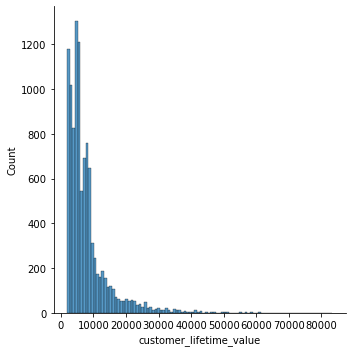

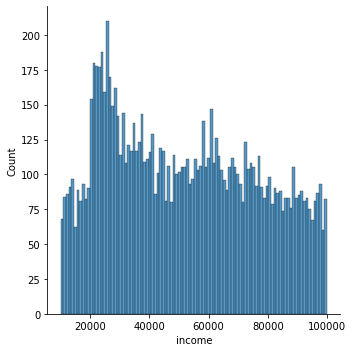

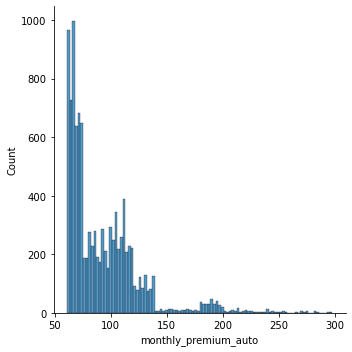

In [239]:
sns.displot((numerical['customer_lifetime_value']), bins=100)
sns.displot((numerical['income']), bins=100)
sns.displot((numerical['monthly_premium_auto']), bins=100)

In [255]:
#  Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables

sns.hisplot((numerical['monthly_premium_auto']), bins=100)

<AxesSubplot:xlabel='number_of_policies', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

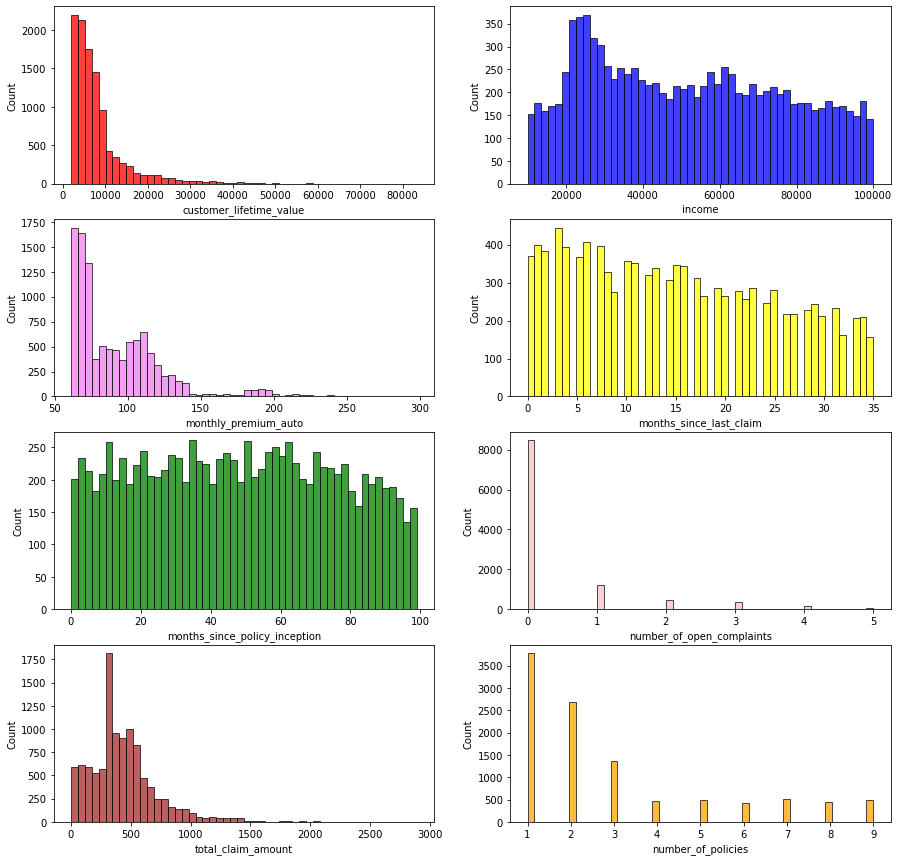

In [300]:
plt.suptitle('seaborn all')

#displot did not work as subplots so we used histplots

fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.histplot((numerical['customer_lifetime_value']), color="red", bins=50, ax=ax[0,0])
sns.histplot((numerical['income']), color="blue", bins=50,ax=ax[0,1])
sns.histplot((numerical['monthly_premium_auto']), color="violet", bins=50,ax=ax[1,0])
sns.histplot((numerical['months_since_last_claim']), color="yellow", bins=50,ax=ax[1,1])
sns.histplot((numerical['months_since_policy_inception']), color="green", bins=50,ax=ax[2,0])
sns.histplot((numerical['number_of_open_complaints']), color="pink", bins=50,ax=ax[2,1])
sns.histplot((numerical['total_claim_amount']), color="brown", bins=50,ax=ax[3,0])
sns.histplot((numerical['number_of_policies']), color="orange", bins=50,ax=ax[3,1])




array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

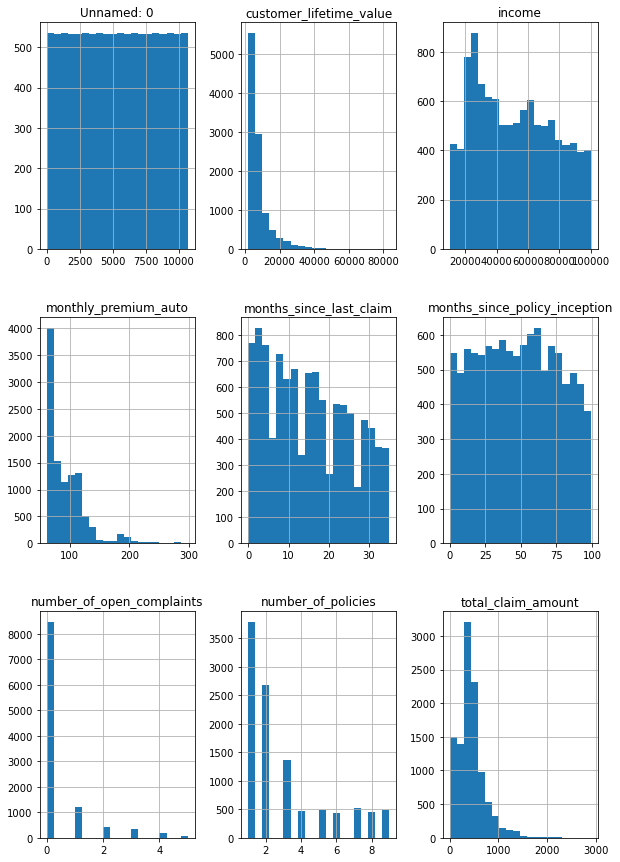

In [301]:
# Use Matplotlib to construct histograms

numerical.hist(figsize=(10,15), bins=20)

In [309]:
# Do the distributions for different numerical variables look like a normal distribution.

# there is not Normal Distribution

In [310]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column `total_claim_amount` later as the target variable.

numerical.corr()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Unnamed: 0,1.000000,0.000914,-0.004264,-0.001076,0.009031,0.013202,0.005535,0.002737,-0.003809
customer_lifetime_value,0.000914,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849
income,-0.004264,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201
monthly_premium_auto,-0.001076,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149
months_since_last_claim,0.009031,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979
months_since_policy_inception,0.013202,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186
number_of_open_complaints,0.005535,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332
number_of_policies,0.002737,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019
total_claim_amount,-0.003809,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000


In [326]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# If there is no pair of features that have a high correlation, then do not drop any features.

numerical.corr() > 0.9 

# there is no pair of features that have a high correlation

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Unnamed: 0,True,False,False,False,False,False,False,False,False
customer_lifetime_value,False,True,False,False,False,False,False,False,False
income,False,False,True,False,False,False,False,False,False
monthly_premium_auto,False,False,False,True,False,False,False,False,False
months_since_last_claim,False,False,False,False,True,False,False,False,False
months_since_policy_inception,False,False,False,False,False,True,False,False,False
number_of_open_complaints,False,False,False,False,False,False,True,False,False
number_of_policies,False,False,False,False,False,False,False,True,False
total_claim_amount,False,False,False,False,False,False,False,False,True


In [387]:
# Show a plot of the total number of responses.

responses = file4.value_counts(categorical["response"])
responses

response
no     9328
yes    1361
dtype: int64

In [388]:
responses = categorical["response"].value_counts()
responses

no     9328
yes    1361
Name: response, dtype: int64

<BarContainer object of 2 artists>

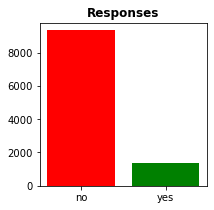

In [389]:

figresp, ax3 = plt.subplots(figsize = (3,3))

ax3.set_title('Responses', fontweight='bold')

ax3.bar(responses.index, responses, color=('red','green'))

In [390]:
# Show a plot of the response rate by the sales channel.

sale_chanel = categorical["sales_channel"].value_counts()
sale_chanel

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<BarContainer object of 4 artists>

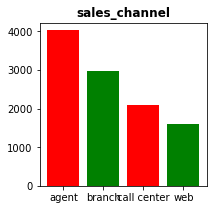

In [391]:
figsale, ax5 = plt.subplots(figsize = (3,3))

ax5.set_title('sales_channel', fontweight='bold')

ax5.bar(sale_chanel.index, sale_chanel, color=('red','green'))

In [392]:
hue = categorical['sales_channel']

resp_sale = categorical["response"].value_counts()
resp_sale

no     9328
yes    1361
Name: response, dtype: int64

In [393]:
channel_responses = categorical.groupby(['response','sales_channel'])['month'].count().reset_index()
channel_responses

,response,sales_channel,month
0,no,agent,3339
1,no,branch,2666
2,no,call center,1895
3,no,web,1428
4,yes,agent,680
5,yes,branch,309
6,yes,call center,204
7,yes,web,168


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

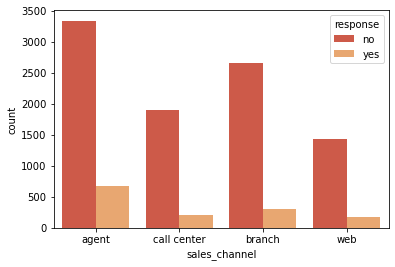

In [394]:
sns.countplot(x='sales_channel', hue='response', data=categorical)

<AxesSubplot:title={'center':'response rate by the total claim amount'}, xlabel='response', ylabel='total_claim_amount'>

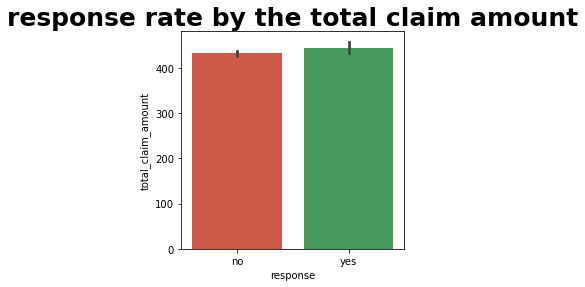

In [416]:
# Show a plot of the response rate by the total claim amount.

sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

fig4, ax4 = plt.subplots(figsize = (4,4))
ax4.set_title('response rate by the total claim amount', size='25', fontweight='bold')

sns.barplot(x = categorical['response'], y = numerical['total_claim_amount'], ax = ax4, palette=palette_alive)


<AxesSubplot:title={'center':'response rate by income'}, xlabel='response', ylabel='income'>

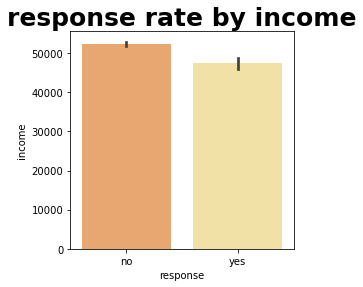

In [420]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C2", "no": "C1"}

fig4, ax4 = plt.subplots(figsize = (4,4))
ax4.set_title('response rate by income', size='25', fontweight='bold')

sns.barplot(x = categorical['response'], y = numerical['income'], ax = ax4, palette=palette_alive)


In [ ]:
# Don't limit your creativity!  :))) never

# plot any interesting findings/insights that describe some interesting facts about your data set and its variables.


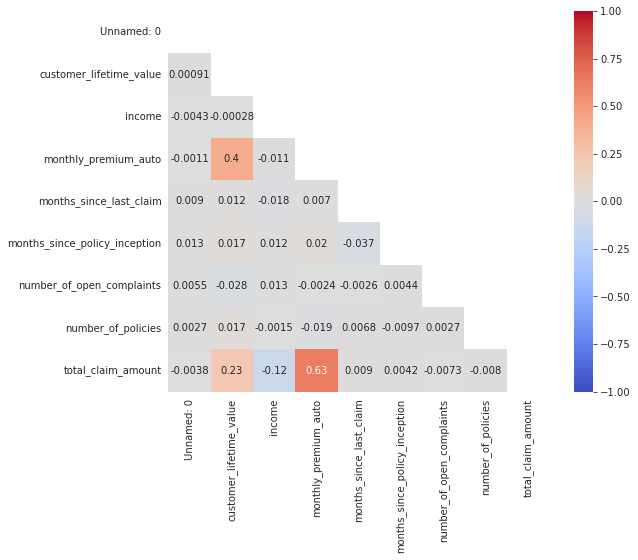

In [428]:
# Plot the Correlation Heatmap.

corr = file4.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)